<a href="https://colab.research.google.com/github/khanhne28/khanh/blob/AI-Homeworks/NhanDangDoAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


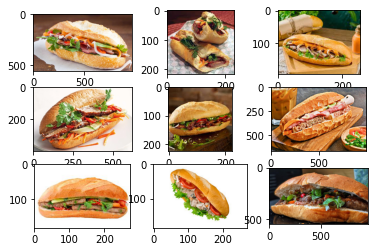

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Food/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'Banhmi'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [5]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/Food/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Banhbao'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Banhchuoi'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Banhmi'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Banhtet'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Banhtrang'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Banhtrungthu'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Comtam'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Dauvexaothit'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Pho'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Thitkhotau'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(100, 200, 200, 3) (100,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
4/4 [==============================] - 9s 2s/step - loss: 10250.0479 - accuracy: 0.0700
Epoch 2/50
4/4 [==============================] - 7s 2s/step - loss: 3886.5210 - accuracy: 0.0800
Epoch 3/50
4/4 [==============================] - 7s 2s/step - loss: 315.9306 - accuracy: 0.1600
Epoch 4/50
4/4 [==============================] - 7s 2s/step - loss: 26.4679 - accuracy: 0.2800
Epoch 5/50
4/4 [==============================] - 7s 2s/step - loss: 2.7757 - accuracy: 0.5300
Epoch 6/50
4/4 [==============================] - 7s 2s/step - loss: 0.7442 - accuracy: 0.7900
Epoch 7/50
4/4 [==============================] - 7s 2s/step - loss: 0.4656 - accuracy: 0.8400
Epoch 8/50
4/4 [==============================] - 7s 2s/step - loss: 0.2856 - accuracy: 0.9400
Epoch 9/50
4/4 [==============================] - 7s 2s/step - loss: 0.1628 - accuracy: 0.9700
Epoch 10/50
4/4 [==============================] - 7s 2s/step - loss: 0.1815 - accuracy: 0.9400
Epoch 11/50
4/4 [======================

In [8]:
model.evaluate(photos,labels)


4/4 [==============================] - 2s 412ms/step - loss: 0.0987 - accuracy: 0.9800


[0.0987207442522049, 0.9800000190734863]

In [9]:
model.save('10Foods.h5')


In [11]:
from keras.models import load_model
models=load_model('10Foods.h5')

In [12]:
classes = ["Banhbao","Banhchuoi","Banhmi","Banhtet","Banhtrang","Banhtrungthu","Comtam","Dauvexaothit","Pho","ThitKhoTau"]

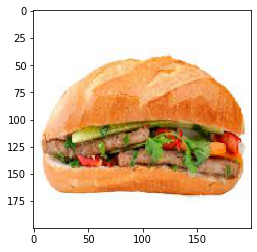

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('banh mi.jpg', target_size=(200,200))
plt.imshow(img)


In [19]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.09342428 0.1016303  0.10746472 0.09920963 0.09944493 0.09470889
  0.09865565 0.10297933 0.10271312 0.0997692 ]]


'Banhmi'